# Линейная регрессия

В этом ноутбуке мы научимся применять модель линейной регрессии для решения задачи регрессии. Мы будем использовать датасет с информацией о пингвинах. 

В первой части ноутбука мы применим линейную регрессию для предсказания длины плавника пингвина по массе его тела. Мы построим линейную регрессию, визуализируем ее решающую поверхность и ошибки модели на элементах датасета.

Во второй части ноутбука мы применим линейную регрессию для предсказания массы тела пингвина по всем его другим характеристикам. 

Начнем с импорта библиотек:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Загрузка датасета

<img src="https://imgur.com/orZWHly.png" alt="Drawing" style="width: 800px;"/>

### Загрузка и визуализация данных

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:	
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Задача 1. Предсказание длины плавника по массе тела

Создадим новый датафрейм, в котором будет две колонки из данных: масса тела и длина плавника. Разобьем его на две переменные X и y. Мы будем решать задачу предсказания длины плавника пингвина по массе его тела, поэтому признаком Х будет масса тела, а признаком y — длина плавника.

In [3]:
X = data[['масса тела']]
y = data['длина плавника']

Разобьем выборку на тренировочную и тестовую:

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные на плоскости:

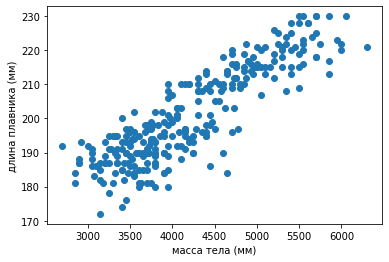

In [5]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('масса тела (мм)');
plt.ylabel('длина плавника (мм)');

plt.show()

Обучим модель линейной регрессии. Модель будет учиться предсказывать величину y (длину плавника) по величине X (массе тела).

Мы будем использовать линейную регрессию из библиотеки sklearn. Вот ссылка на ее докумнтацию: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# заводим модель линейной регрессии
lr = LinearRegression()

# обучим линейную регрессию
lr.fit(X_train, y_train)

LinearRegression()

Выведем значения коэффициентов линейной регрессии. 
- lr.coef_ — коэффициент, соответствующий признаку X ($k_1$), 
- lr.intercept_ — свободный член ($k_0$).

In [8]:
lr.coef_, lr.intercept_

(array([0.01508072]), 137.39767634457831)

Визуализируем данные и прямую, которую выражает модель. 

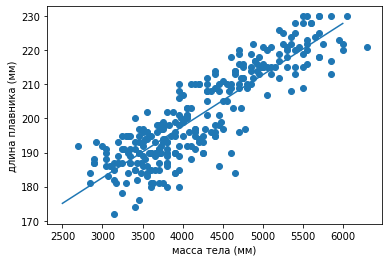

In [17]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = k_1*x_1 + k_0
def f_line(x):
    return  lr.coef_*x + lr.intercept_

x = [2500, 6000]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Теперь визуализируем точки тестовой выборки и прямую, которую выражает модель:

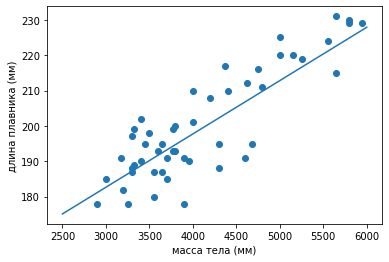

In [18]:
# визуализируем точки тестовой выборки
plt.scatter(X_test, y_test)

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
    return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Получим предсказания линейной регрессии на тренировочной и тестовой выборках:

In [19]:
# предсказание линейной регрессии для элементов тренировочной выборки
y_train_predicted = lr.predict(X_train)
# предсказание линейной регрессии для элементов тестовой выборки
y_test_predicted = lr.predict(X_test)

In [20]:
np.array(y_test)

array([219., 187., 198., 191., 215., 178., 187., 185., 210., 193., 187.,
       193., 185., 195., 188., 224., 182., 178., 180., 231., 195., 230.,
       199., 188., 216., 195., 191., 193., 201., 220., 211., 229., 210.,
       197., 178., 190., 189., 199., 195., 229., 212., 225., 200., 217.,
       220., 202., 191., 208., 190., 191.])

In [21]:
np.array(y_test_predicted)

array([216.57144402, 190.93422401, 190.18018813, 196.21247519,
       222.60373108, 186.41000871, 187.1640446 , 182.6398293 ,
       197.72054695, 194.70440342, 192.44229578, 191.68825989,
       193.19633166, 192.44229578, 187.1640446 , 221.09565931,
       185.65597283, 196.21247519, 190.93422401, 222.60373108,
       207.90003137, 224.86583873, 194.32738548, 202.24476225,
       209.03108519, 202.24476225, 185.27895489, 194.32738548,
       197.72054695, 215.06337225, 209.78512108, 224.86583873,
       203.75283401, 187.1640446 , 181.13175754, 188.67211636,
       187.54106254, 187.54106254, 189.42615224, 227.12794638,
       207.14599549, 212.80126461, 194.70440342, 203.37581607,
       212.80126461, 188.67211636, 193.19633166, 200.73669048,
       196.96651107, 206.76897755])

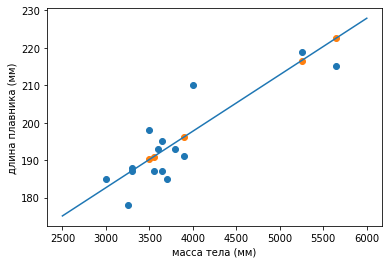

In [24]:
# визуализируем точки тестовой выборки
plt.scatter(X_test[:15], y_test[:15])

# визуализируем предсказания линейной регрессии
plt.scatter(X_test[:5], y_test_predicted[:5])

# визуализируем прямую, которую выражает линейная регрессия
def f_line(x):
    return  lr.coef_*x + lr.intercept_

x_line = np.linspace(2500, 6000, 100)
y_line = f_line(x_line)
plt.plot(x_line, y_line)

plt.xlabel('масса тела (мм)')
plt.ylabel('длина плавника (мм)')

plt.show()

Посчитаем метрики качества MAE и MSE для тренировочной и тестовой выборок. Мы будем использовать для этого функции из sklearn.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(5.456787595952175, 6.314875871167212)

In [27]:
np.mean(np.abs(y_train_predicted - y_train))

5.4567875959521785

In [28]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(44.469097468657644, 58.784058067547875)

In [29]:
np.mean((y_train_predicted - y_train)**2)

44.46909746865763

## Задача 2. Предсказание длины плавника по массе тела и длине клюва

Посмотрим снова на наши данные:

In [30]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Запишем в переменную Х признаки, по которым мы будем предсказывать ответ ('масса тела', 'длина клюва'), а в переменную y — целевую переменную ('длина плавника'):

In [31]:
X = data[['масса тела', 'длина клюва']]
y = data['длина плавника']

Также поделим данные на тренировочную и тестовую выборки:

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Визуализируем данные в виде точек в трехмерном пространстве. По оси ОХ отложим значение признака "масса тела", по оси OY — значение признака "длина клюва", по оси OZ — ответ, т.е. значение переменной "длина плавника".

<IPython.core.display.Javascript object>


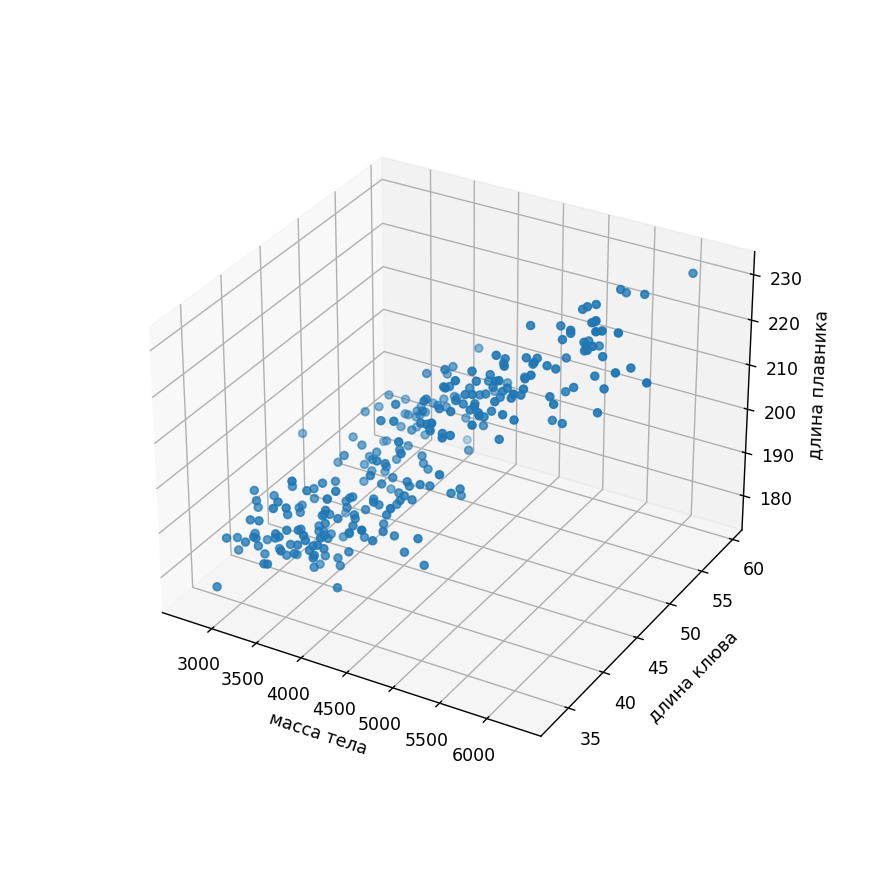

In [35]:
%matplotlib notebook

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Обучим модель линейной регрессии.

Каждый элемент — это массив значений двух признаков.

In [36]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания:

In [37]:
y_train_predicted = lr.predict(X_train)

y_train_predicted

array([209.84839098, 205.69579499, 188.80443225, 224.62097701,
       190.98255289, 207.88178606, 204.77239863, 192.73651775,
       190.76991283, 192.56860509, 200.77534747, 218.49390567,
       182.9493449 , 202.37489185, 212.58846917, 192.51825594,
       200.33432648, 193.66553584, 186.50312637, 203.01730943,
       216.03705495, 190.10950568, 191.26353167, 185.95915838,
       206.73338182, 219.75537603, 208.32393141, 198.03302059,
       214.88752636, 201.55669117, 211.87546418, 203.30503429,
       189.83752169, 199.02700436, 192.41755765, 180.86517647,
       187.70075541, 223.74568111, 201.10892409, 203.89035664,
       200.71825224, 190.75866935, 197.21931731, 208.65076194,
       181.36104401, 199.31810226, 195.09829191, 192.96602303,
       221.94474015, 207.94450303, 192.42880113, 197.67495483,
       209.92347578, 189.02044536, 212.69928659, 216.36163679,
       180.7062586 , 201.83092386, 185.73977223, 210.66884035,
       222.1618776 , 201.60029423, 199.18929527, 219.15

Теперь визуализируем плоскость, которую задает регрессия. 

Выведем коэффициенты, которые модель поставила в соответствие признакам. 
- coef_ — это коэффициенты $k_1$ и $k_2$, соответствующие двум признакам в нашем датасете ("масса тела" и "длины клюва")
- intercept_ — это ксвободный член, коэффициент $k_0$

In [38]:
lr.coef_, lr.intercept_

(array([0.0131182 , 0.54846538]), 121.54870011318171)

Зададим уравнение плоскости, которую задает линейная регрессия:
$$y = k_1 \cdot (масса \ тела) + k_2 \cdot (длина \ клюва) + k_0$$

In [39]:
def f_plane(x1, x2):
    return lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

# то же самое можно было записать в виде lambda-функции:
# f_plane = lambda x1, x2: lr.coef_[0]*x1 + lr.coef_[1]*x2 + lr.intercept_

Визуализируем плоскость, точки выборки и ответы линейной регрессии на точки выборки:

In [40]:
X_train['длина клюва'].min(), X_train['длина клюва'].max()

(33.1, 59.6)

<IPython.core.display.Javascript object>


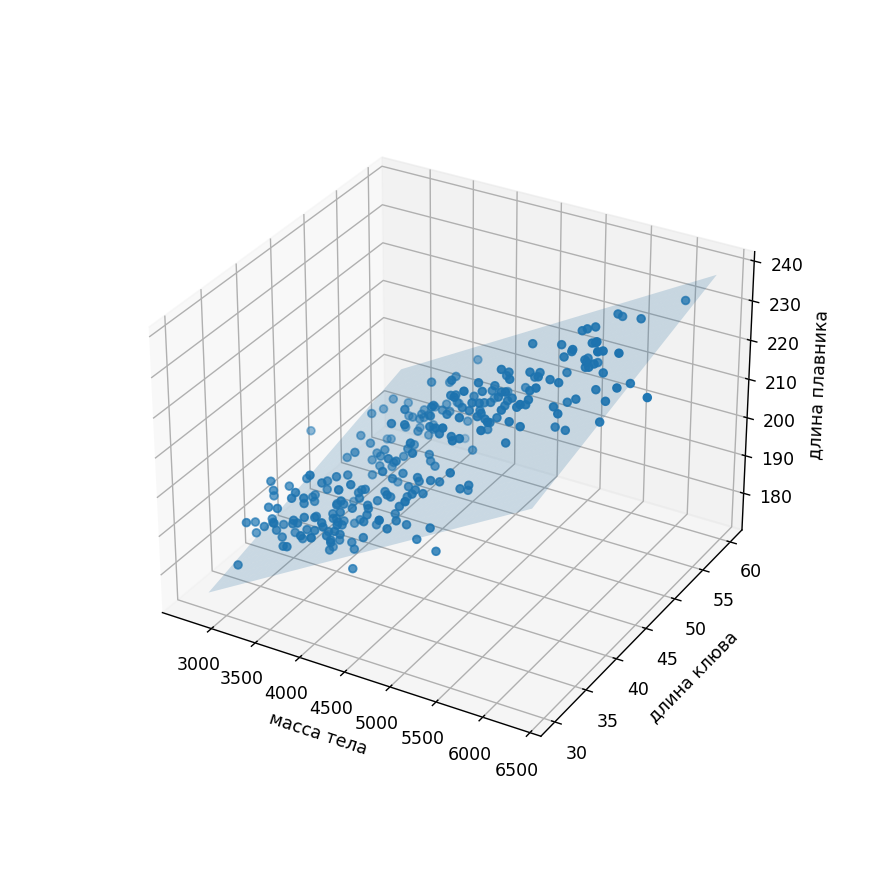

In [43]:
%matplotlib notebook

# если вы работаете не в google colab, а в jupyter notebook локально,
# замените строчку выше на эту:
# %matplotlib notebook
# тогда можно будет 3D-график поворачивать и рассматривать с разных сторон

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')

# визуализируем точки обучающей выборки
x_points = X_train['масса тела']
y_points = X_train['длина клюва']
z_points = y_train

ax.scatter(x_points, y_points, z_points)

# визуализируем плоскость
x, y = np.meshgrid(range(2800, 6350), range(30, 61));
z = np.array([f_plane(point_x, point_y) for point_x, point_y in zip(x, y)]);
ax.plot_surface(x, y, z, alpha=0.2);

# раскомментируйте строчку ниже, чтобы визуализировать
# ответы линейной регрессии на плоскости
# ax.scatter(x_points, y_points, y_train_predicted, c='r');


ax.set_xlabel('масса тела');
ax.set_ylabel('длина клюва');
ax.set_zlabel('длина плавника');

plt.show()

Видим, что линейная регрессия неплохо описывает наши точки!

## Задача 3. Предсказание массы тела по всем остальным признакам

Наконец, давайте решим более сложную задачу: предсказние массы тела пингвина по остальным пяти его признакам из датасета.

In [44]:
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


Разделим данные на признаки и целевую переменную:

In [45]:
X = data.drop(columns=['масса тела'])
y = data['масса тела']

In [46]:
X.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,пол
0,0,2,39.1,18.7,181.0,1
1,0,2,39.5,17.4,186.0,0
2,0,2,40.3,18.0,195.0,0
3,0,2,36.7,19.3,193.0,0
4,0,2,39.3,20.6,190.0,1


Поделим данные на train и test:

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Обучим линейную регрессию на тренировочной части:

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

Получим предсказания линейной регрессии на тренировочной и тестовой частях датасета:

In [50]:
y_train_predicted = lr.predict(X_train)
y_test_predicted = lr.predict(X_test)

Посчитаем MAE и MSE

In [51]:
mean_absolute_error(y_train_predicted, y_train), mean_absolute_error(y_test_predicted, y_test)

(264.21265694804634, 267.6818006578597)

In [52]:
mean_squared_error(y_train_predicted, y_train), mean_squared_error(y_test_predicted, y_test)

(106938.2299618511, 98888.49315845082)

### Оценка важности признаков линейной регрессии

Давайте еще раз посмотрим на наши признаки и на коэффициенты, которые линейная регрессия поставила в соответствие каждому из них:

In [53]:
X_train.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,пол
81,0,1,36.9,18.6,189.0,0
282,2,0,47.7,15.0,216.0,0
120,0,2,38.8,17.6,191.0,0
9,0,2,34.6,21.1,198.0,1
65,0,2,39.7,18.4,190.0,1


In [54]:
lr.coef_, lr.intercept_

(array([ 262.19174421, -106.88491131,  -20.14378722,  -17.23884101,
          31.73499572,  561.09168748]),
 -1448.0062690507393)

In [55]:
for i, feature in enumerate(X_train.columns):
    print(feature, ' '*(19-len(feature)), '|  ', 'k_'+str(i+1), '  |  ', lr.coef_[i])


вид                  |   k_1   |   262.1917442070453
остров               |   k_2   |   -106.8849113115029
длина клюва          |   k_3   |   -20.143787221472554
ширина клюва         |   k_4   |   -17.238841005411814
длина плавника       |   k_5   |   31.73499571757072
пол                  |   k_6   |   561.0916874777612


Модули значений коэффициентов линейной регрессии отражают важности признаков. т.е. насколько важную роль признак играет в получении ответа моделью линейной регрессии.

Однако нельзя считать, что чем больше модуль коэффициента при признаке, тем больше его важность. Вот почему:

Уравнение линейной регрессии в данном случае имеет вид:

$$ y = k_5x_5 + k_4x_4 + k_3x_3 + k_2x_2 + k_1x_1 + k_0$$

Посмотрим на признаки "вид" ($k_1$) и "длина плавника" ($k_5$) и на коэффициенты, которые им соответствуют. 

Может показаться, что, раз коэффицент для признака $k_1$ больше по модулю, чем для признака $k_5$, то признак $k_1$ играет бОльшую роль в предсказании массы тела, чем признак $k_5$. Однако это не так. Посмотрим на то, в каких границах варьируются значения признаков $k_1$ и $k_5$:
- у $k_1$ всего 3 варианта значения: 0, 1 и 2. Поэтому значение $k_1x_1$ будет варьироваться от 0 до примерно 300-600
- у $k_5$ много вариантов значений, но все они лежат в диапазоне [174, 230]. Поэтому значение $k_5x_5$ будет лежать в диапазоне $\sim $ [6500, 9000]

Получается, для любого элемента датасета значение $k_5x_5$ больше, чем $k_1x_1$. Более того, изменение значения признака $k_1$ меняет значение $k_1x_1$ где-то на 250, а изменение значения признака $k_5$ может менять значение $k_5x_5$ на 1000 или больше. 

Получается, величина $k_5x_5$ может сильнее изменять ответ, чем величина $k_1x_1$ и значение признака $k_5$ сильнее влияет на итоговый ответ, чем значение признака $k_1$. 

Иными словами, масса тела пингвина сильнее связана с длиной плавника пингвина, чем с видом пингвина.

In [56]:
X_train['длина плавника'].min(), X_train['длина плавника'].max()

(172.0, 231.0)

### Сравнение линейной регрессии и KNN

В заключение давайте сравним качества моделей линейной регрессии и алгоритма k ближайших соседей на нашей задаче предсказания массы тела пингвина по другим его характеристикам.

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn = KNeighborsRegressor(n_neighbors=5)

In [59]:
knn.fit(X_train, y_train)
y_train_predicted_knn = knn.predict(X_train)
y_test_predicted_knn = knn.predict(X_test)

In [60]:
y_train_predicted_lr = lr.predict(X_train)
y_test_predicted_lr = lr.predict(X_test)

MAE и MSE на train выборке для KNN:

In [61]:
mean_absolute_error(y_train_predicted_knn, y_train), mean_squared_error(y_train_predicted_knn, y_train)

(224.32862190812722, 79719.69964664312)

MAE на и MSE train выборке для LR:

In [62]:
mean_absolute_error(y_train_predicted_lr, y_train), mean_squared_error(y_train_predicted_lr, y_train)

(264.21265694804634, 106938.2299618511)

MAE и MSE на test выборке для KNN:

In [63]:
mean_absolute_error(y_test_predicted_knn, y_test), mean_squared_error(y_test_predicted_knn, y_test)

(246.9, 93141.5)

MAE и MSE на test выборке для LR:

In [64]:
mean_absolute_error(y_test_predicted_lr, y_test), mean_squared_error(y_test_predicted_lr, y_test)

(267.6818006578597, 98888.49315845082)

Видим, что результаты работы алгоритмов разные, но отличаются не сильно. О том, как при решении задачи выбрать лучшую модель, вы узнаете на следующих занятиях.